In [27]:
import os
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/Colab Notebooks/<your-path-goes-here>')

# Confirm that the files are accessible
os.listdir()

['WA_Fn-UseC_-Telco-Customer-Churn.csv',
IPW_DR_BalanceChecks_v2_with_Bootstrap.ipynb']

In [29]:
# import packages needed for this notebook
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
raw_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
raw_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [31]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [32]:
object_cols = raw_df.select_dtypes(include='object').columns

In [33]:
raw_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [34]:
for i in object_cols:
    print("--- ---")
    print(raw_df[i].value_counts())
    print()

--- ---
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

--- ---
gender
Male      3555
Female    3488
Name: count, dtype: int64

--- ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64

--- ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

--- ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

--- ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

--- ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

--- ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

--- ---
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: cou

In [35]:
for col in object_cols:
    print(f"Column '{col}': {raw_df[col].nunique()} unique values")


Column 'customerID': 7043 unique values
Column 'gender': 2 unique values
Column 'Partner': 2 unique values
Column 'Dependents': 2 unique values
Column 'PhoneService': 2 unique values
Column 'MultipleLines': 3 unique values
Column 'InternetService': 3 unique values
Column 'OnlineSecurity': 3 unique values
Column 'OnlineBackup': 3 unique values
Column 'DeviceProtection': 3 unique values
Column 'TechSupport': 3 unique values
Column 'StreamingTV': 3 unique values
Column 'StreamingMovies': 3 unique values
Column 'Contract': 3 unique values
Column 'PaperlessBilling': 2 unique values
Column 'PaymentMethod': 4 unique values
Column 'TotalCharges': 6531 unique values
Column 'Churn': 2 unique values


In [36]:
import numpy as np
raw_df['TotalCharges'] = raw_df['TotalCharges'].replace(" ", np.nan)
raw_df['TotalCharges'] = raw_df['TotalCharges'].astype(float)
raw_df['TotalCharges'] = raw_df['TotalCharges'].fillna(0)

In [37]:
for i in object_cols:
    print("--- ---")
    print(raw_df[i].value_counts())
    print()

--- ---
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

--- ---
gender
Male      3555
Female    3488
Name: count, dtype: int64

--- ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64

--- ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

--- ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

--- ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

--- ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

--- ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

--- ---
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: cou

# Exploratory analysis & Visualizations

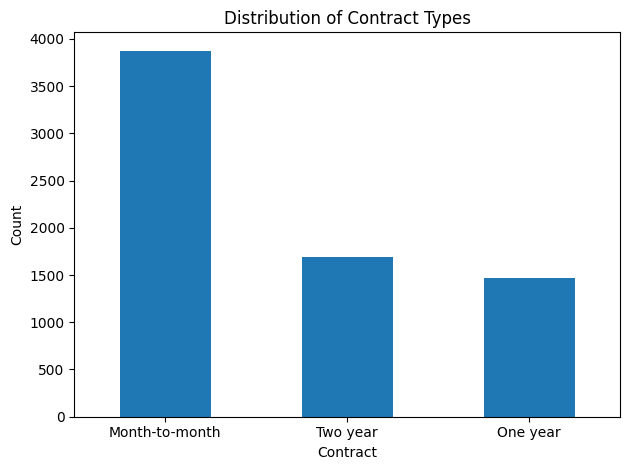

In [38]:
plt.figure()
raw_df["Contract"].value_counts().plot(kind="bar")
plt.title("Distribution of Contract Types")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


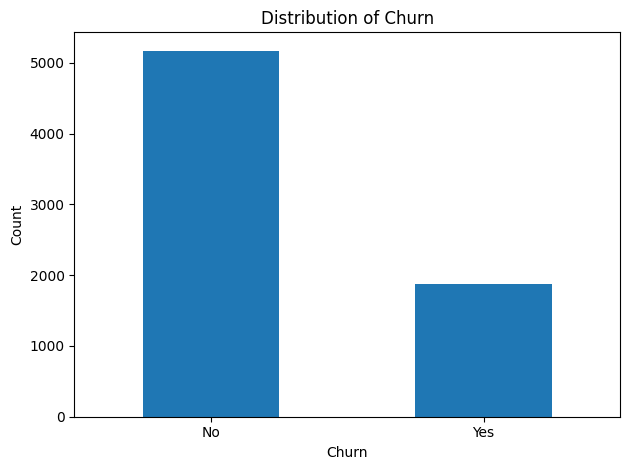

In [39]:
plt.figure()
raw_df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


<Figure size 640x480 with 0 Axes>

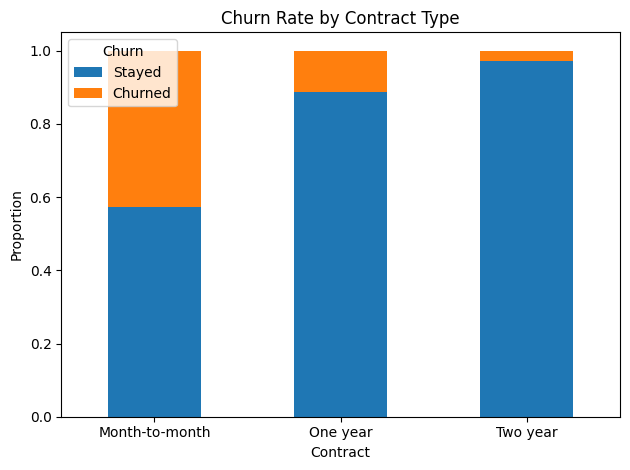

In [40]:
# Cross-tab of churn by contract
ct = pd.crosstab(raw_df["Contract"], raw_df["Churn"], normalize="index")
print(ct)

plt.figure()
ct.plot(kind="bar", stacked=True)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Proportion")
plt.legend(["Stayed", "Churned"], title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Our Hypothesis (Main effect of contract type):
Customers on long-term contracts (1- or 2-year) have a lower probability of churn than customers on month-to-month contracts, even after adjusting for demographics and service mix.

InternetService_Fiber optic, InternetService_No
→ baseline = DSL

3 payment method dummies
→ baseline = Bank transfer (automatic)

MultipleLines_No phone service, MultipleLines_Yes
→ baseline = No

# Encoding

In [41]:
df = raw_df.copy()

# Fix TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

# Outcome
df["Y"] = (df["Churn"] == "Yes").astype(int)

# Treatment: long-term vs month-to-month
df["D"] = df["Contract"].isin(["One year", "Two year"]).astype(int)

# Gender -> isMale
df["isMale"] = (df["gender"] == "Male").astype(int)

# Simple Yes/No binaries
yes_no_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for c in yes_no_cols:
    df[c] = (df[c] == "Yes").astype(int)

# Add-on services: Yes = 1, No or No internet service = 0
addon_cols = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]
for c in addon_cols:
    df[c] = (df[c] == "Yes").astype(int)

# One-hot encode InternetService, PaymentMethod, MultipleLines
cat_cols = ["InternetService", "PaymentMethod", "MultipleLines"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Optional: force all dummies to int (if they come out bool)
dummy_cols = [c for c in df.columns if any(x in c for x in ["InternetService_", "PaymentMethod_", "MultipleLines_"])]
df[dummy_cols] = df[dummy_cols].astype(int)

# Drop non-modeling text columns
drop_cols = ["customerID", "gender", "Churn", "Contract"]
df = df.drop(columns=drop_cols)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

In [43]:
import re

# Get current columns of df
current_cols = df.columns.tolist()

# Create a mapping for renaming
rename_mapping = {}
for col in current_cols:
    if ' ' in col:
        # Replace spaces and other non-alphanumeric (except underscore) with underscore
        sanitized_col = re.sub(r'[^a-zA-Z0-9_]+', '_', col)
        # Ensure the name does not start or end with an underscore unnecessarily
        sanitized_col = sanitized_col.strip('_')
        rename_mapping[col] = sanitized_col

# Rename columns in df
if rename_mapping:
    df.rename(columns=rename_mapping, inplace=True)
    print("Columns renamed successfully. Updated columns in 'df':")
else:
    print("No columns with spaces found in 'df' to rename.")

print(df.columns.tolist())

Columns renamed successfully. Updated columns in 'df':
['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Y', 'D', 'isMale', 'InternetService_Fiber_optic', 'InternetService_No', 'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check', 'MultipleLines_No_phone_service', 'MultipleLines_Yes']


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SeniorCitizen                        7043 non-null   int64  
 1   Partner                              7043 non-null   int64  
 2   Dependents                           7043 non-null   int64  
 3   tenure                               7043 non-null   int64  
 4   PhoneService                         7043 non-null   int64  
 5   OnlineSecurity                       7043 non-null   int64  
 6   OnlineBackup                         7043 non-null   int64  
 7   DeviceProtection                     7043 non-null   int64  
 8   TechSupport                          7043 non-null   int64  
 9   StreamingTV                          7043 non-null   int64  
 10  StreamingMovies                      7043 non-null   int64  
 11  PaperlessBilling              

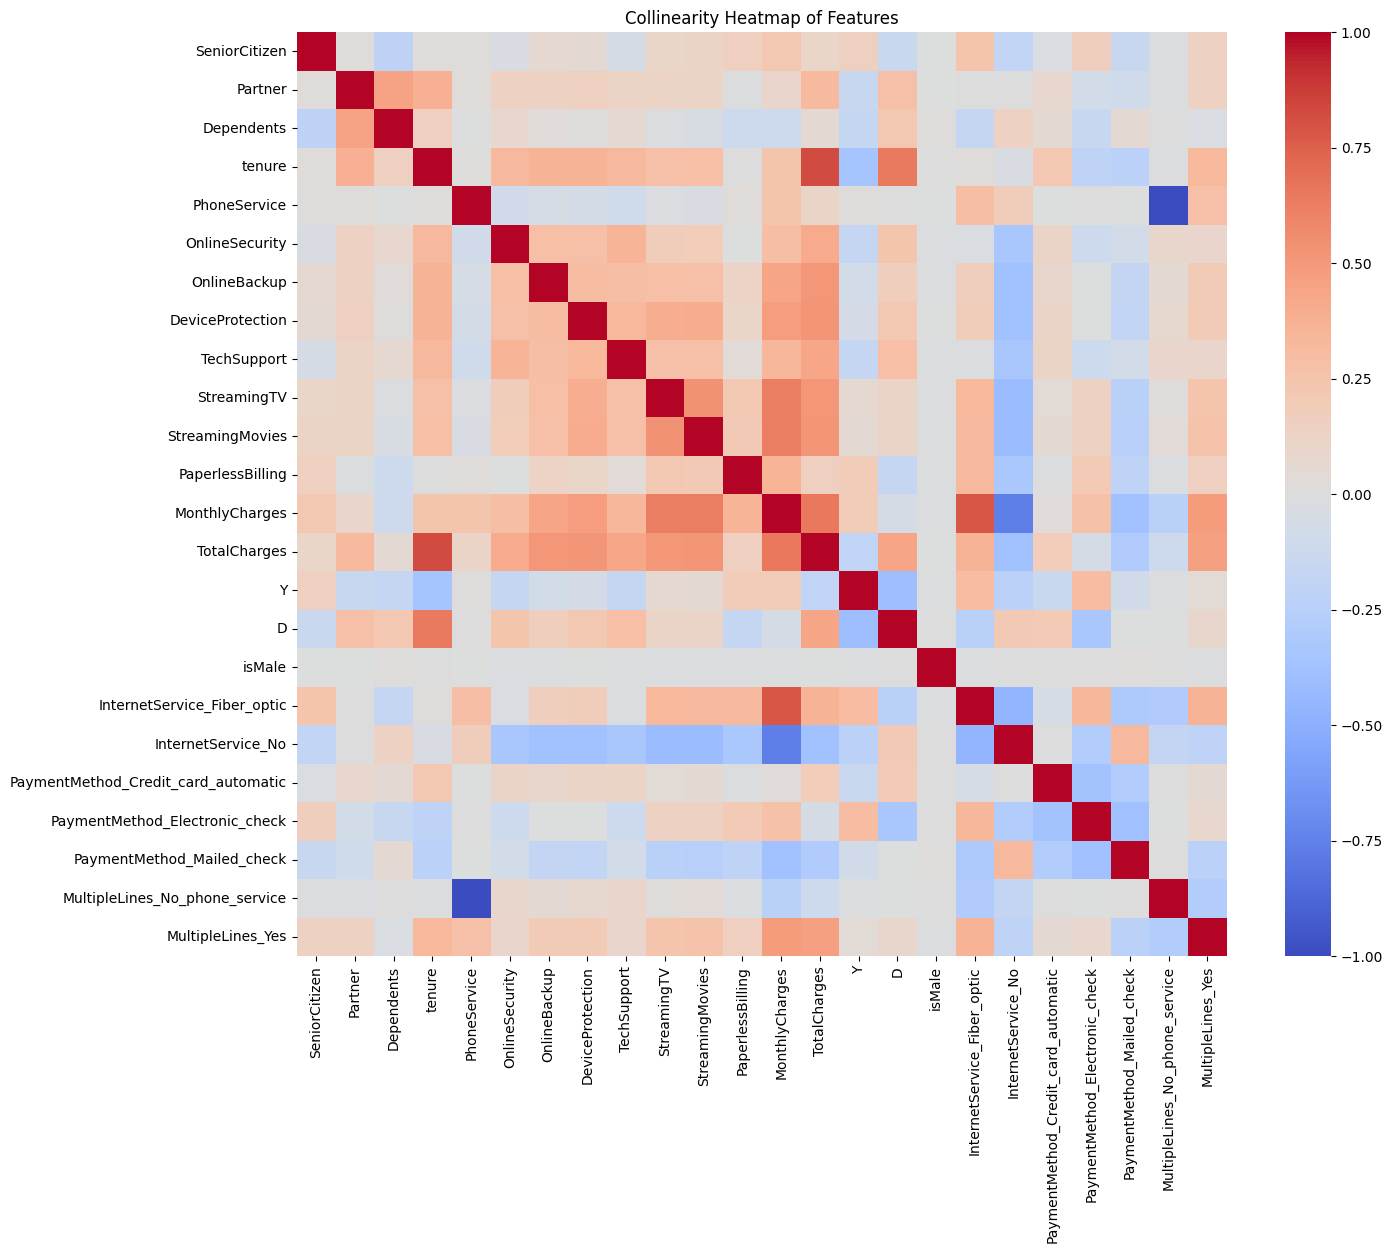

In [45]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Collinearity Heatmap of Features')
plt.show()

In [46]:
# Dropping "TotalCharges" as it might cause multicollinearity. The high correlation of tenure with D is not a problem for the propensity score model
df = df.drop(columns=['TotalCharges'])
print("DataFrame after dropping TotalCharges:")
df.head()

DataFrame after dropping TotalCharges:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Y,D,isMale,InternetService_Fiber_optic,InternetService_No,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,MultipleLines_No_phone_service,MultipleLines_Yes
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,34,1,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
2,0,0,0,2,1,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,0,0,0,45,0,1,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


# Double Lasso

In [47]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ensure Y, D are defined from the previous cells
Y = df["Y"].values       # churn
D = df["D"].values       # long-term contract indicator
X_cols = [c for c in df.columns if c not in ["Y", "D"]]
X = df[X_cols]

# Standardize the features for Lasso regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 1. Lasso for Outcome Model (Y ~ X) ---
# Using Logistic Regression with L1 penalty for binary outcome
# C is the inverse of regularization strength; smaller C means stronger regularization.
# We start with C=0.1 for relatively strong regularization.
lasso_y = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=0.1)
lasso_y.fit(X_scaled, Y)

# Get selected covariates for Y (coefficients not equal to zero)
# X_cols correctly represents the order of columns in X
selected_coeffs_y = lasso_y.coef_[0]
selected_covariates_y = [X_cols[i] for i, coef in enumerate(selected_coeffs_y) if coef != 0]

print(f"Covariates selected for Y ({len(selected_covariates_y)}):\n{selected_covariates_y}")

# --- 2. Lasso for Treatment Model (D ~ X) ---
# Using Logistic Regression with L1 penalty for binary treatment
lasso_d = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=0.1)
lasso_d.fit(X_scaled, D)

# Get selected covariates for D
selected_coeffs_d = lasso_d.coef_[0]
selected_covariates_d = [X_cols[i] for i, coef in enumerate(selected_coeffs_d) if coef != 0]

print(f"\nCovariates selected for D ({len(selected_covariates_d)}):\n{selected_covariates_d}")

# --- 3. Combine selected covariates ---
# Use a set to get unique covariates from both selections
combined_selected_covariates = list(set(selected_covariates_y) | set(selected_covariates_d))
print(f"\nCombined selected covariates ({len(combined_selected_covariates)}):\n{combined_selected_covariates}")

# --- 4. Final GLM with selected covariates and treatment ---
# Create a temporary DataFrame for statsmodels, including Y, D, and the combined selected covariates
df_double_lasso = df[["Y", "D"] + combined_selected_covariates].copy()

# Construct the formula for the GLM model
# The treatment variable 'D' is included, along with the combined selected covariates
if combined_selected_covariates:
    formula_double_lasso = "Y ~ D + " + " + ".join(combined_selected_covariates)
else: # Handle the edge case where no covariates are selected by Lasso
    formula_double_lasso = "Y ~ D"

print(f"\nGLM Formula: {formula_double_lasso}")

# Fit the GLM model (Logistic Regression as Y is a binary outcome)
double_lasso_model = smf.glm(
    formula=formula_double_lasso,
    data=df_double_lasso,
    family=sm.families.Binomial()
).fit()

print("\nDouble Lasso GLM Results:")
print(double_lasso_model.summary())

# Extract the ATE estimate (coefficient of D) from the GLM
ate_double_lasso = double_lasso_model.params['D']
print(f"\nDouble Lasso ATE Estimate (coefficient of D - log-odds ratio): {ate_double_lasso:.4f}")

# Note: For binary outcomes and GLM with Binomial family, the ATE is expressed as a log-odds ratio.
# To obtain a risk difference or odds ratio, further calculations (e.g., exponentiating for odds ratio
# or calculating average marginal effects) would be required.

Covariates selected for Y (17):
['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'InternetService_Fiber_optic', 'InternetService_No', 'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check', 'MultipleLines_No_phone_service', 'MultipleLines_Yes']

Covariates selected for D (20):
['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'isMale', 'InternetService_Fiber_optic', 'InternetService_No', 'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check', 'MultipleLines_No_phone_service', 'MultipleLines_Yes']

Combined selected covariates (20):
['PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check', 'DeviceProtection', 'PaymentMethod_Credit_card_automatic', 

# IPW

In [48]:
import numpy as np
import pandas as pd

# Outcome and treatment
Y = df["Y"].values       # churn
D = df["D"].values       # long-term contract indicator

# All other columns are covariates
X_cols = [c for c in df.columns if c not in ["Y", "D"]]
X = df[X_cols]

In [49]:
df.groupby("D")["Y"].mean()

,Y
D,
0,0.427097
1,0.067551


In [50]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
propensity_model_rf = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for small datasets and binary targets
propensity_model_rf.fit(X, D)

# Get the propensity scores (probability of being treated)
propensity_scores_rf = propensity_model_rf.predict_proba(X)[:, 1]

# Display the first few propensity scores
print("First 5 propensity scores (Logistic Regression):")
print(propensity_scores_rf[:5])

First 5 propensity scores (Logistic Regression):
[0.00542035 0.61985865 0.039181   0.87202451 0.00184561]


In [51]:
def summary_stats(a):
    a = np.asarray(a)
    qs = np.quantile(a, [0, 0.25, 0.5, 0.75, 1.0])
    out = {
        "Min": qs[0],
        "1st Qu.": qs[1],
        "Median": qs[2],
        "Mean": float(np.mean(a)),
        "3rd Qu.": qs[3],
        "Max": qs[4],
    }
    print(out)
    return out

In [52]:
summary_stats(propensity_scores_rf)

{'Min': np.float64(0.0007320229918052322), '1st Qu.': np.float64(0.046854633335267626), 'Median': np.float64(0.37567369262259154), 'Mean': 0.45003028842939435, '3rd Qu.': np.float64(0.8720630773371831), 'Max': np.float64(0.9982752320584573)}


{'Min': np.float64(0.0007320229918052322),
 '1st Qu.': np.float64(0.046854633335267626),
 'Median': np.float64(0.37567369262259154),
 'Mean': 0.45003028842939435,
 '3rd Qu.': np.float64(0.8720630773371831),
 'Max': np.float64(0.9982752320584573)}

In [53]:
# Clip propensity scores to the range [0.01, 0.99]
propensity_scores_rf_clipped = np.clip(propensity_scores_rf, 0.01, 0.99)

# Display summary statistics of the clipped propensity scores
summary_stats(propensity_scores_rf_clipped)

{'Min': np.float64(0.01), '1st Qu.': np.float64(0.046854633335267626), 'Median': np.float64(0.37567369262259154), 'Mean': 0.4504400826371479, '3rd Qu.': np.float64(0.8720630773371831), 'Max': np.float64(0.99)}


{'Min': np.float64(0.01),
 '1st Qu.': np.float64(0.046854633335267626),
 'Median': np.float64(0.37567369262259154),
 'Mean': 0.4504400826371479,
 '3rd Qu.': np.float64(0.8720630773371831),
 'Max': np.float64(0.99)}

In [54]:
H = D / propensity_scores_rf_clipped - (1 - D) / (1 - propensity_scores_rf_clipped)
ipw = np.mean(Y * H)
ipw

np.float64(-0.21026391810378967)

100%|██████████| 500/500 [04:38<00:00,  1.80it/s]

IPW ATE (original sample): -0.21026391810378967
Bootstrap SE: 0.005797937301718254
95% CI (normal approx): [-0.2216, -0.1989]


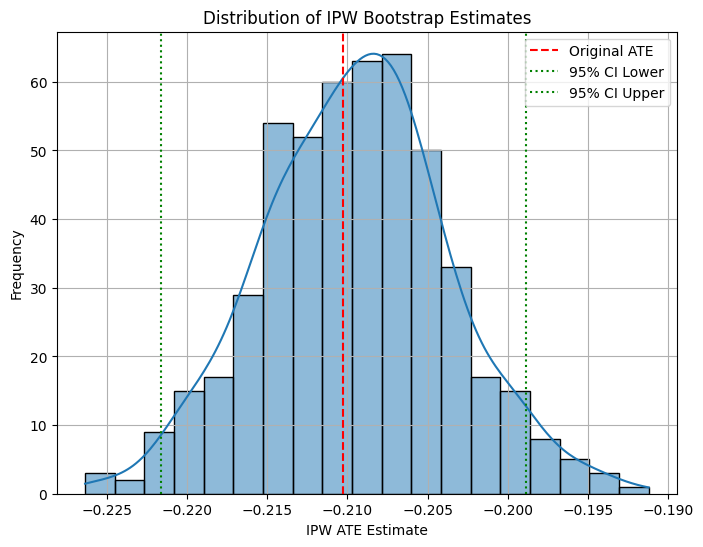

In [55]:

from tqdm import trange
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Now: bootstrap
B = 500
boot_estimates = []
n = X.shape[0]

for _ in trange(B):
    boot_idx = np.random.choice(n, size=n, replace=True)
    Xb = X.iloc[boot_idx]
    Db = D[boot_idx]
    yb = Y[boot_idx]

    # fit propensity score model in bootstrap sample
    propensity_model_rf_b = RandomForestClassifier(n_estimators=100, random_state=42)
    propensity_model_rf_b.fit(Xb, Db)

    ps_b = propensity_model_rf_b.predict_proba(Xb)[:, 1]
    ps_b_clipped = np.clip(ps_b, 0.01, 0.99)

    Hb = Db / ps_b_clipped - (1 - Db) / (1 - ps_b_clipped)
    ipw_b = np.mean(yb * Hb)
    boot_estimates.append(ipw_b)

boot_estimates = np.array(boot_estimates)

# Bootstrap SE and CI
se_boot = boot_estimates.std(ddof=1)
ci_lower = ipw - 1.96 * se_boot
ci_upper = ipw + 1.96 * se_boot

print("IPW ATE (original sample):", ipw)
print("Bootstrap SE:", se_boot)
print(f"95% CI (normal approx): [{ci_lower:.4f}, {ci_upper:.4f}]")

# Create a histogram of bootstrap results
plt.figure(figsize=(8, 6))
sns.histplot(boot_estimates, kde=True)
plt.title('Distribution of IPW Bootstrap Estimates')
plt.xlabel('IPW ATE Estimate')
plt.ylabel('Frequency')
plt.axvline(x=ipw, color='red', linestyle='--', label='Original ATE')
plt.axvline(x=ci_lower, color='green', linestyle=':', label='95% CI Lower')
plt.axvline(x=ci_upper, color='green', linestyle=':', label='95% CI Upper')
plt.legend()
plt.grid(True)
plt.show()


# Double Robust Estimator

Doubly Robust (DR) estimator, also known as the Augmented Inverse Probability Weighting (AIPW) estimator, which is preferred because it remains consistent if either the propensity score model or the outcome model is correctly specified.

The Doubly Robust (DR) estimator combines the propensity score model (used in IPW) with separate outcome models for the treated and control groups.

We used a logistic regression for the outcome models (m1 and m0), as outcome (Y, churn) is binary.

In [56]:
X_cols

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'isMale',
 'InternetService_Fiber_optic',
 'InternetService_No',
 'PaymentMethod_Credit_card_automatic',
 'PaymentMethod_Electronic_check',
 'PaymentMethod_Mailed_check',
 'MultipleLines_No_phone_service',
 'MultipleLines_Yes']

1. Outcome Model Specification

In the original IPW part, you defined X_cols as all covariates. We'll use these to fit the outcome models. Since Y is a binary outcome (Churn: 0 or 1), a logistic regression (sm.families.Binomial()) is the appropriate choice for the outcome models m^1​ and m^0​.

In [57]:
# Create DataFrame versions of Y and D for easier use with statsmodels formulas
df_temp = X.copy()
df_temp["Y"] = Y
df_temp["D"] = D

# Full list of covariates for the outcome model formula
# We exclude 'TotalCharges' from the formula due to its high correlation with 'tenure'
# and known issues with endogeneity in churn prediction models.
outcome_X_cols = [c for c in X_cols if c != "TotalCharges"]
outcome_formula = "Y ~ " + " + ".join(outcome_X_cols)

# Separate the treated (D=1, long-term contract) and control (D=0, month-to-month) groups
treated_df = df_temp[df_temp["D"] == 1]
control_df = df_temp[df_temp["D"] == 0]

# --- Fit the outcome model for the treated group (m1) ---
# Predicts P(Y=1|X) if D=1 (long-term contract)
fit1 = smf.glm(
    formula=outcome_formula,
    data=treated_df,
    family=sm.families.Binomial() # Use Logistic Regression for binary outcome Y
).fit()

# --- Fit the outcome model for the control group (m0) ---
# Predicts P(Y=1|X) if D=0 (month-to-month contract)
fit0 = smf.glm(
    formula=outcome_formula,
    data=control_df,
    family=sm.families.Binomial()
).fit()

# Calculate predicted outcomes (m1 and m0) for *all* units
# These predictions are the estimated conditional mean outcomes E[Y|X, D]
m1 = fit1.predict(df_temp)  # predicted P(Churn=Yes) for every customer, if they had D=1
m0 = fit0.predict(df_temp)  # predicted P(Churn=Yes) for every customer, if they had D=0

2. Doubly Robust Estimate Calculation

Now, we use the predicted outcomes (m^1​,m^0​), the actual outcomes (Y), the treatment indicator (D), and the clipped propensity scores (e^, which you calculated as propensity_scores_rf_clipped) to calculate the Doubly Robust estimate.

In [58]:
# Get the necessary values
ps = propensity_scores_rf_clipped

# Outcome model estimate of ATE (mean of individual treatment effects E[Y(1)|X] - E[Y(0)|X])
tau_Y = (m1 - m0).mean()

# Doubly Robust Estimate (AIPW formula)
dr_est = (
    tau_Y
    + np.mean(D * (Y - m1) / ps)
    - np.mean((1 - D) * (Y - m0) / (1 - ps))
)

print(f"Doubly Robust ATE Estimate: {dr_est:.4f}")

Doubly Robust ATE Estimate: -0.1650


3. Bootstrap Standard Error for DR Estimator

As with IPW, we must use a bootstrap procedure that refits both the PS model and the outcome models in each resample to get a valid standard error and confidence interval.

DR Bootstrap: 100%|██████████| 500/500 [06:02<00:00,  1.38it/s]



--- Doubly Robust Results ---
DR ATE (original sample): -0.16501825726955835
Bootstrap SE: 0.015390270605782748
95% CI (normal approx): [-0.1952, -0.1349]


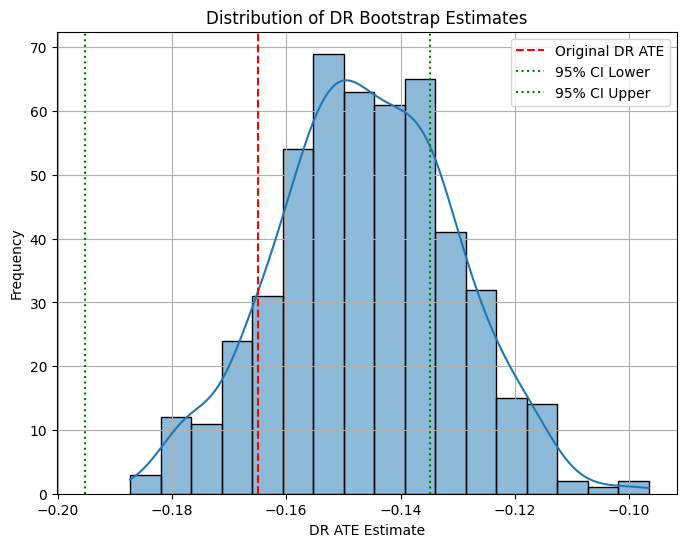

In [59]:
# --- Bootstrap for Doubly Robust Estimator ---
from tqdm import trange

B = 500
boot_dr_estimates = []
n = X.shape[0]

for _ in trange(B, desc="DR Bootstrap"):
    # 1. Sample with replacement
    boot_idx = np.random.choice(n, size=n, replace=True)
    Xb = X.iloc[boot_idx]
    Db = D[boot_idx]
    yb = Y[boot_idx]

    boot_df = Xb.copy()
    boot_df["Y"] = yb
    boot_df["D"] = Db

    # 2. Refit PS model (Random Forest)
    propensity_model_rf_b = RandomForestClassifier(n_estimators=100, random_state=42)
    propensity_model_rf_b.fit(Xb, Db)
    ps_b = propensity_model_rf_b.predict_proba(Xb)[:, 1]
    ps_b_clipped = np.clip(ps_b, 0.01, 0.99)

    # 3. Refit Outcome Models (Logistic Regression)
    # Fit m1
    treated_b = boot_df[boot_df["D"] == 1]
    fit1_b = smf.glm(
        formula=outcome_formula,
        data=treated_b,
        family=sm.families.Binomial()
    ).fit()
    m1_b = fit1_b.predict(boot_df)

    # Fit m0
    control_b = boot_df[boot_df["D"] == 0]
    fit0_b = smf.glm(
        formula=outcome_formula,
        data=control_b,
        family=sm.families.Binomial()
    ).fit()
    m0_b = fit0_b.predict(boot_df)

    # 4. Calculate DR estimate for bootstrap sample
    tau_Y_b = (m1_b - m0_b).mean()
    dr_b = (
        tau_Y_b
        + np.mean(Db * (yb - m1_b) / ps_b_clipped)
        - np.mean((1 - Db) * (yb - m0_b) / (1 - ps_b_clipped))
    )
    boot_dr_estimates.append(dr_b)

# --- Compute CI ---
boot_dr_estimates = np.array(boot_dr_estimates)
se_dr = boot_dr_estimates.std(ddof=1)
ci_dr_lower = dr_est - 1.96 * se_dr
ci_dr_upper = dr_est + 1.96 * se_dr

print("\n--- Doubly Robust Results ---")
print("DR ATE (original sample):", dr_est)
print("Bootstrap SE:", se_dr)
print(f"95% CI (normal approx): [{ci_dr_lower:.4f}, {ci_dr_upper:.4f}]")

# Create a histogram of DR bootstrap results
plt.figure(figsize=(8, 6))
sns.histplot(boot_dr_estimates, kde=True)
plt.title('Distribution of DR Bootstrap Estimates')
plt.xlabel('DR ATE Estimate')
plt.ylabel('Frequency')
plt.axvline(x=dr_est, color='red', linestyle='--', label='Original DR ATE')
plt.axvline(x=ci_dr_lower, color='green', linestyle=':', label='95% CI Lower')
plt.axvline(x=ci_dr_upper, color='green', linestyle=':', label='95% CI Upper')
plt.legend()
plt.grid(True)
plt.show()


# Double ML

In [60]:
!pip install doubleml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.1/581.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 36.7 MB/s eta 0:00:00


In [61]:
# =========================================================================
# DOUBLE MACHINE LEARNING (DML) IMPLEMENTATION FOR CHURN ATE
# =========================================================================

# The DML method automatically uses cross-fitting and the Neyman Orthogonality
# principle to ensure the final ATE estimate and its standard errors are valid,
# even when using complex Machine Learning models for the nuisance parameters.

import doubleml as dml
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# -------------------------------------------------------------------------
# 1. Prepare Data for DoubleML
# -------------------------------------------------------------------------

# The outcome (Y) and treatment (D) were already prepared in previous cells.
# Y: Churn (Binary, 0/1)
# D: Long-Term Contract (Binary, 0/1)


# List of covariates (excluding Y and D)
X_cols_df2 = combined_selected_covariates

# Create the DoubleMLData object using df2
dml_data_df2 = dml.DoubleMLData(
    data=df,
    y_col='Y',
    d_cols='D',
    x_cols=X_cols_df2
)

print("DoubleML Data Object Summary (using df2 with AddOnCount):")
print(dml_data_df2)


# -------------------------------------------------------------------------
# 2. Define Learners and DML Models
# -------------------------------------------------------------------------

# We use the Partially Linear Regression (PLR) model class: DoubleMLPLR.
# This assumes the causal effect is constant (ATE).
# The outcome model (ml_l) estimates E[Y|X], and the PS model (ml_m) estimates E[D|X].

# --- Learner Definitions ---
# The outcome (Y) is binary, but DoubleML treats it as continuous if we use a
# linear model, which is acceptable if we use a classification model (like Logistic
# Regression or RandomForestClassifier) for ml_l, as DML is robust to this.

# Nuisance Model for Outcome (ml_l): E[Y|X]
# Use a flexible classification model for E[Y|X] since Y is binary (Churn 0/1)
learner_l = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Nuisance Model for Propensity Score (ml_m): E[D|X]
# Use a flexible classification model for E[D|X] since D is binary (Contract 0/1)
learner_m = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Set the number of cross-fitting folds (e.g., 5-fold cross-fitting)
n_folds = 5


# -------------------------------------------------------------------------
# 3. Fit the DoubleML Model and Output Results
# -------------------------------------------------------------------------

# The 'fit' method performs the cross-fitting and final ATE estimation.
dml_plr_rf_new = dml.DoubleMLPLR(
    dml_data_df2, # Use the new dml_data_df2
    ml_l=learner_l,
    ml_m=learner_m,
    n_folds=n_folds
)

print("\n--- Running DoubleML PLR with Random Forest Learners (5-fold Cross-fitting) using df2 ---")
dml_plr_rf_new.fit()

# The summary contains the ATE estimate (coef), standard error (std err),
# t-statistic (t), p-value (P>|t|), and 95% Confidence Interval.
print("\nDoubleML ATE Estimate Summary (Random Forest Learners with AddOnCount):")
print(dml_plr_rf_new.summary)

# ATE Interpretation:
# The coefficient represents the causal effect of moving from D=0 (month-to-month contract)
# to D=1 (long-term contract) on the outcome Y (likelihood of Churn). Since D=1
# is the long-term contract, a *negative* coefficient means that this contract
# *reduces* the likelihood of churn.

DoubleML Data Object Summary (using df2 with AddOnCount):
================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): ['D']
Covariates: ['PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check', 'DeviceProtection', 'PaymentMethod_Credit_card_automatic', 'tenure', 'TechSupport', 'isMale', 'InternetService_Fiber_optic', 'MultipleLines_Yes', 'InternetService_No', 'OnlineBackup', 'PhoneService', 'StreamingTV', 'Partner', 'PaperlessBilling', 'Dependents', 'SeniorCitizen', 'OnlineSecurity', 'StreamingMovies', 'MultipleLines_No_phone_service']
Instrument variable(s): None
No. Observations: 7043

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 23 entries, SeniorCitizen to MultipleLines_Yes
dtypes: float64(1), int64(22)
memory usage: 1.2 MB


--- Running DoubleML PLR with Random Forest Learners (5-fold 

/usr/local/lib/python3.12/dist-packages/doubleml/plm/plr.py:127: UserWarning: The ml_l learner RandomForestClassifier(max_depth=5, random_state=42) was identified as classifier. Fitting an additive probability model.
  warnings.warn(



DoubleML ATE Estimate Summary (Random Forest Learners with AddOnCount):
      coef   std err          t         P>|t|     2.5 %    97.5 %
D -0.15098  0.012232 -12.342643  5.337460e-35 -0.174955 -0.127005


# Balance Checks


## Overlap between the treatment and control groups distributions

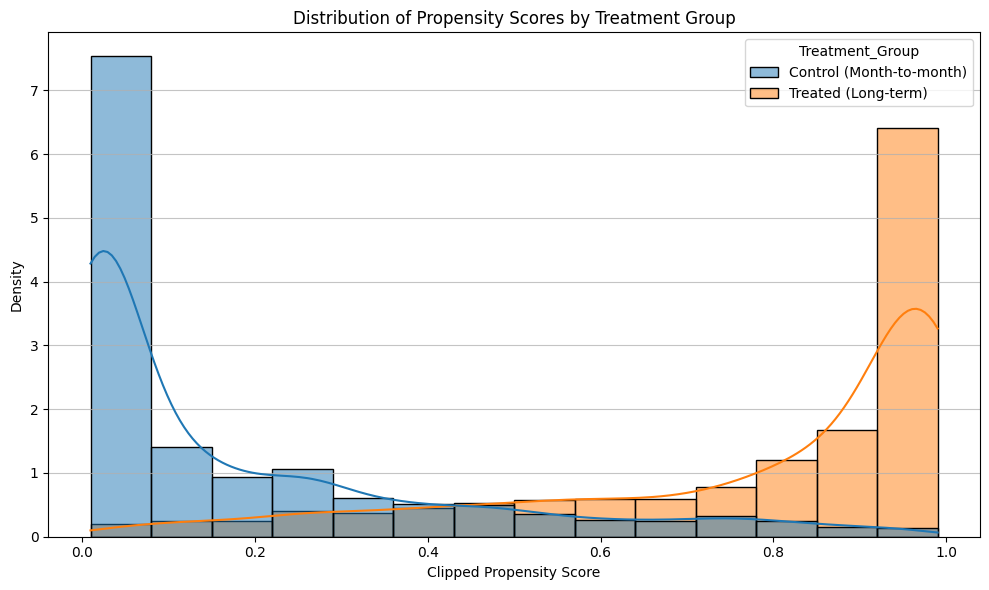

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a temporary DataFrame for plotting
plot_df = pd.DataFrame({
    'Propensity_Score': propensity_scores_rf_clipped,
    'Treatment': D
})

# Map treatment indicator to descriptive labels
plot_df['Treatment_Group'] = plot_df['Treatment'].map({0: 'Control (Month-to-month)', 1: 'Treated (Long-term)'})

plt.figure(figsize=(10, 6))
sns.histplot(
    data=plot_df,
    x='Propensity_Score',
    hue='Treatment_Group',
    kde=True,  # Plot kernel density estimate
    stat='density', # Normalize histogram to show density
    common_norm=False, # Normalize each histogram independently
    alpha=0.5
)
plt.title('Distribution of Propensity Scores by Treatment Group')
plt.xlabel('Clipped Propensity Score')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Standardized Mean Difference Plot

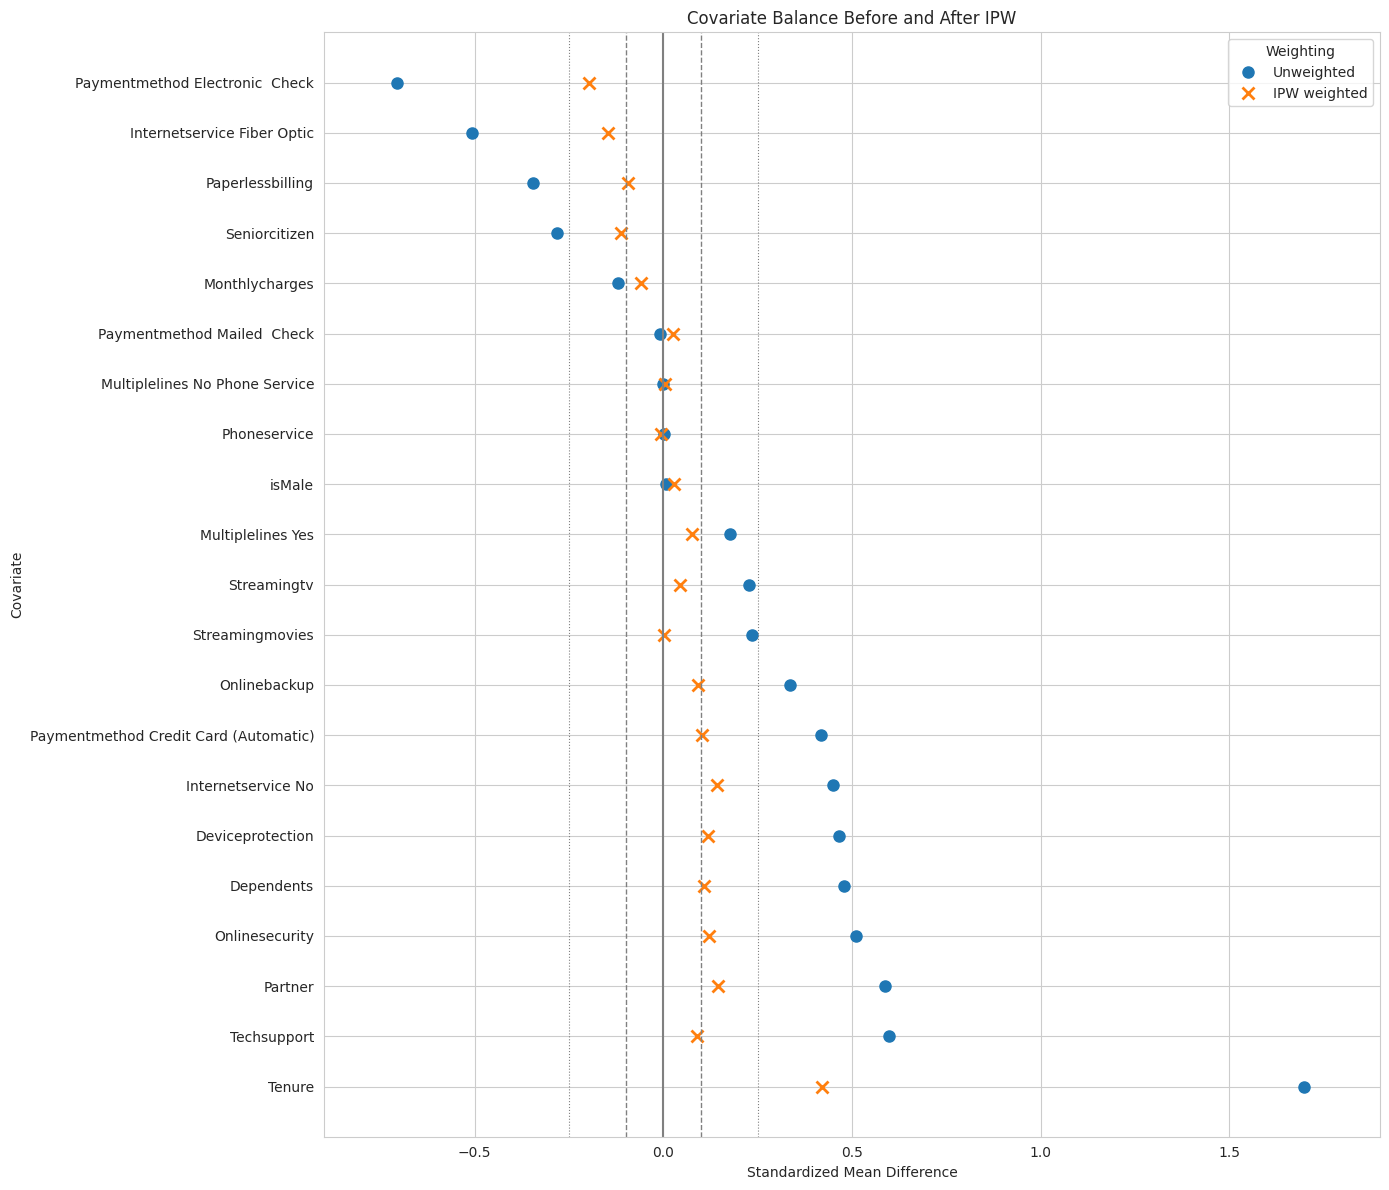


SMD Data Table (Sorted by Initial Imbalance):
                                Covariate  Unweighted  IPW weighted
0                                  Tenure    1.698938      0.421287
1                             Techsupport    0.598147      0.088202
2                                 Partner    0.588178      0.143933
3                          Onlinesecurity    0.511602      0.121757
4                              Dependents    0.478758      0.108146
5                        Deviceprotection    0.465560      0.118448
6                      Internetservice No    0.450330      0.143321
7   Paymentmethod Credit Card (Automatic)    0.419131      0.102226
8                            Onlinebackup    0.334503      0.091428
9                         Streamingmovies    0.236029      0.001380
10                            Streamingtv    0.227109      0.044570
11                      Multiplelines Yes    0.177970      0.076789
12                                 isMale    0.006805      0.028975
1

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- ASSUMPTIONS ---
# This code assumes the following variables are already defined from your notebook:
# 1. df: The final processed DataFrame containing Y, D, and X columns.
# 2. X_cols: The list of covariate names (e.g., ['SeniorCitizen', 'Partner', ...]).
# 3. propensity_scores_rf_clipped: The PS estimates used for weighting.
# 4. D: The treatment array (df['D'].values).

# Recreate necessary variables for a self-contained example
# (In your actual notebook, these would come from previous cells)
D = df['D'].values
ps = propensity_scores_rf_clipped
X = df[X_cols]

# --------------------------------------------------------------------------
# 1. HELPER FUNCTION: Calculate Standardized Mean Difference (SMD)
# --------------------------------------------------------------------------

def calculate_smd(X_col, D, weights=None):
    """
    Calculates the Standardized Mean Difference for a single covariate.

    Args:
        X_col (pd.Series): The covariate column data.
        D (np.ndarray): The treatment indicator (0 or 1).
        weights (np.ndarray, optional): Weights for the weighted mean/variance.
    """
    X_t = X_col[D == 1]
    X_c = X_col[D == 0]

    if weights is None:
        # Unweighted means and variances
        mean_t = X_t.mean()
        mean_c = X_c.mean()
        var_t = X_t.var(ddof=1)
        var_c = X_c.var(ddof=1)
    else:
        # Weighted means and variances (using IPW weights)
        W_t = weights[D == 1]
        W_c = weights[D == 0]

        # Weighted Means
        mean_t = np.average(X_t, weights=W_t)
        mean_c = np.average(X_c, weights=W_c)

        # Weighted Variance (using the denominator from IPW variance formula, not standard robust variance)
        # For PS balance checks, a common approach is to use the unweighted pooled SD
        # However, for plotting the IPW effect, we often use the unweighted pooled SD in the denominator
        # to standardize the unit of comparison, but use the weighted means in the numerator.
        var_t = X_t.var(ddof=1)
        var_c = X_c.var(ddof=1)


    # Calculate pooled standard deviation (denominator) using unweighted variances
    n_t = len(X_t)
    n_c = len(X_c)
    # The standard way to standardize for the SMD denominator is using the pooled SD or Control SD.
    # We use the standard pooled SD:
    pooled_std = np.sqrt(((n_t - 1) * var_t + (n_c - 1) * var_c) / (n_t + n_c - 2))

    # Calculate SMD (numerator is always the difference in means)
    smd = (mean_t - mean_c) / pooled_std

    return smd

# --------------------------------------------------------------------------
# 2. CALCULATE UNWEIGHTED AND WEIGHTED SMDs
# --------------------------------------------------------------------------

smd_results = []

# IPW weights (D/e(X) for treated, (1-D)/(1-e(X)) for control)
weights_ipw = D / ps + (1 - D) / (1 - ps)

for col in X_cols:
    X_col = df[col]

    # 1. Unweighted SMD (weights=None)
    unweighted_smd = calculate_smd(X_col, D, weights=None)

    # 2. IPW Weighted SMD (using the calculated weights)
    # Note: We pass the weights for the treated and control groups separately
    # to the calculate_smd function for the means calculation.

    # The SMD calculation is sensitive, especially for binary variables.
    # For simplicity and standard implementation, we often use the unweighted
    # standard deviation in the denominator for all SMDs.

    smd_t = np.average(X_col[D == 1], weights=weights_ipw[D == 1])
    smd_c = np.average(X_col[D == 0], weights=weights_ipw[D == 0])

    # Re-calculating the denominator (pooled std) for the IPW weighted SMD:
    X_t_unweighted = X_col[D == 1]
    X_c_unweighted = X_col[D == 0]
    n_t = len(X_t_unweighted)
    n_c = len(X_c_unweighted)
    pooled_std = np.sqrt(((n_t - 1) * X_t_unweighted.var(ddof=1) + (n_c - 1) * X_c_unweighted.var(ddof=1)) / (n_t + n_c - 2))

    weighted_smd = (smd_t - smd_c) / pooled_std

    smd_results.append({
        'Covariate': col.replace('_', ' ').title().replace('Automatic', '(Automatic)').replace('Check', ' Check').replace('Ismale', 'isMale'),
        'Unweighted': unweighted_smd,
        'IPW weighted': weighted_smd
    })

smd_df = pd.DataFrame(smd_results).sort_values(by='Unweighted', ascending=False).reset_index(drop=True)

# --------------------------------------------------------------------------
# 3. PLOTTING THE BALANCE RESULTS
# --------------------------------------------------------------------------

# Increased figsize to give more space for covariate labels and scatter points
plt.figure(figsize=(14, 12))
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '-'})

# --- Plot the Data Points ---
# Unweighted (Blue Circles)
plt.plot(smd_df['Unweighted'], smd_df['Covariate'], 'o',
         color='#1f77b4', label='Unweighted', markersize=8)

# IPW Weighted (Orange Crosses)
plt.plot(smd_df['IPW weighted'], smd_df['Covariate'], 'x',
         color='#ff7f0e', label='IPW weighted', markersize=8, markeredgewidth=2)

# --- Add Reference Lines (Thresholds) ---
# Center line (SMD = 0)
plt.axvline(0, color='gray', linestyle='-', linewidth=1.5)

# Standard threshold lines (SMD = 0.1 and -0.1)
plt.axvline(0.1, color='gray', linestyle='--', linewidth=1)
plt.axvline(-0.1, color='gray', linestyle='--', linewidth=1)

# Optional: Higher threshold lines (SMD = 0.25 and -0.25)
plt.axvline(0.25, color='gray', linestyle=':', linewidth=0.8)
plt.axvline(-0.25, color='gray', linestyle=':', linewidth=0.8)


# --- Aesthetics and Labels ---
plt.title('Covariate Balance Before and After IPW')
plt.xlabel('Standardized Mean Difference')
plt.ylabel('Covariate')
plt.legend(loc='upper right', title='Weighting')
# Adjusted X limits to accommodate large unweighted SMDs (up to approx 1.7)
plt.xlim(-0.9, 1.9)

plt.tight_layout()
plt.show()

print("\nSMD Data Table (Sorted by Initial Imbalance):")
print(smd_df)

# IPW Trimming from [0.1, 0.99] to [0.05, 0.95]

In [64]:
import numpy as np
import pandas as pd

# Outcome and treatment
Y = df["Y"].values       # churn
D = df["D"].values       # long-term contract indicator

# All other columns are covariates
X_cols = [c for c in df.columns if c not in ["Y", "D"]]
X = df[X_cols]

In [65]:
df.groupby("D")["Y"].mean()

,Y
D,
0,0.427097
1,0.067551


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize and train the Random Forest Classifier model
propensity_model_lr = LogisticRegression(     # give it enough iterations to converge
    solver="liblinear"  # good for smaller datasets / binary D
)
propensity_model_lr.fit(X, D)

ps_lr = propensity_model_lr.predict_proba(X)[:, 1]
df["ps_lr"] = ps_lr

print(df["ps_lr"].describe())

count    7043.000000
mean        0.450030
std         0.383584
min         0.000732
25%         0.046855
50%         0.375674
75%         0.872063
max         0.998275
Name: ps_lr, dtype: float64


In [67]:
# choose trimming bounds
lower, upper = 0.05, 0.95

mask = (df["ps_lr"] >= lower) & (df["ps_lr"] <= upper)
df_trim = df.loc[mask].copy()

print("Original N:", len(df))
print("After trimming:", len(df_trim))


Original N: 7043
After trimming: 4062


In [68]:
D = df_trim["D"].values
ps = df_trim["ps_lr"].values
Y = df_trim["Y"].values

df_trim["w_ipw_lr"] = np.where(
    D == 1,
    1.0 / ps,
    1.0 / (1.0 - ps)
)


In [69]:
H = D / ps - (1 - D) / (1 - ps)

ipw_ate = np.mean(Y * H)

print(f"Mean of H (should be ≈ 0): {H.mean():.4f}")
print(f"IPW ATE (logit, trimmed): {ipw_ate:.4f}")


Mean of H (should be ≈ 0): -0.0097
IPW ATE (logit, trimmed): -0.1230


In [70]:
from tqdm import trange
exclude_cols = [
    "Y", "D",                # outcome & treatment
    "ps_xgb", "ps_xgb_clipped", "ps_lr",   # propensity scores
    "w_ipw_xgb", "w_treat", "w_ctrl", "w_sipw_lr", "w_ipw_lr"  # weights
]

covariates = [c for c in df_trim.columns if c not in exclude_cols]

X_trim = df_trim[covariates]          # DataFrame
D_trim = df_trim["D"].values          # numpy array
Y_trim = df_trim["Y"].values

# -------------------------------------------------------------------
# 2. Bootstrap *within* the trimmed sample
# -------------------------------------------------------------------
B = 500
n_trim = len(Y_trim)
boot_estimates = np.empty(B)

for b in trange(B):
    # resample indices from the trimmed sample
    boot_idx = np.random.choice(n_trim, size=n_trim, replace=True)

    # bootstrap sample
    if hasattr(X_trim, "iloc"):     # DataFrame
        Xb = X_trim.iloc[boot_idx]
    else:                           # numpy array
        Xb = X_trim[boot_idx]

    Db = D_trim[boot_idx]
    yb = Y_trim[boot_idx]

    # fit PS in bootstrap sample
    propensity_model_lr_b = LogisticRegression(
        solver="liblinear",
        max_iter=1000
    )
    propensity_model_lr_b.fit(Xb, Db)

    ps_b = propensity_model_lr_b.predict_proba(Xb)[:, 1]
    ps_b_clipped = np.clip(ps_b, 0.01, 0.99)

    Hb = Db / ps_b_clipped - (1 - Db) / (1 - ps_b_clipped)
    ipw_b = np.mean(yb * Hb)

    boot_estimates[b] = ipw_b

# -------------------------------------------------------------------
# 3. Bootstrap SE and 95% CI around the trimmed IPW ATE
# -------------------------------------------------------------------

# original trimmed ATE (using the same ps_lr & trim)
ps_trim_clipped = np.clip(df_trim["ps_lr"].values, 0.01, 0.99)
H_trim = D_trim / ps_trim_clipped - (1 - D_trim) / (1 - ps_trim_clipped)
ipw_ate_trim = np.mean(Y_trim * H_trim)

se_boot = boot_estimates.std(ddof=1)
ci_lower = ipw_ate_trim - 1.96 * se_boot
ci_upper = ipw_ate_trim + 1.96 * se_boot

print(f"Bootstrap SE (trimmed): {se_boot:.4f}")
print(f"95% CI (normal approx, trimmed): [{ci_lower:.44f}, {ci_upper:.4f}]")

100%|██████████| 500/500 [00:13<00:00, 36.59it/s]

Bootstrap SE (trimmed): 0.0152
95% CI (normal approx, trimmed): [-0.15271907793629055372086611441773129627108574, -0.0933]


In [71]:
import numpy as np
import pandas as pd

def smd_unweighted(df, covariates, treat_col="D"):
    """
    Standardized mean differences without weights.
    Returns a DataFrame with SMD for each covariate.
    """
    rows = []

    for col in covariates:
        x1 = df.loc[df[treat_col] == 1, col].astype(float)
        x0 = df.loc[df[treat_col] == 0, col].astype(float)

        m1, m0 = x1.mean(), x0.mean()
        v1, v0 = x1.var(ddof=1), x0.var(ddof=1)

        sd_pooled = np.sqrt(0.5 * (v1 + v0))
        smd = (m1 - m0) / sd_pooled if sd_pooled > 0 else 0.0

        rows.append({
            "variable": col,
            "SMD_unw": smd
        })

    return pd.DataFrame(rows)


def smd_weighted(df, covariates, treat_col="D", weight_col="w"):
    """
    Standardized mean differences with weights (IPW, OW, etc.).
    Returns a DataFrame with weighted SMD for each covariate.
    """
    rows = []

    for col in covariates:
        x = df[col].astype(float)
        d = df[treat_col]
        w = df[weight_col].astype(float)

        # treated and control masks
        mask1 = (d == 1)
        mask0 = (d == 0)

        x1, x0 = x[mask1], x[mask0]
        w1, w0 = w[mask1], w[mask0]

        # weighted means
        m1 = np.average(x1, weights=w1)
        m0 = np.average(x0, weights=w0)

        # weighted variances (population version)
        v1 = np.average((x1 - m1) ** 2, weights=w1)
        v0 = np.average((x0 - m0) ** 2, weights=w0)

        sd_pooled = np.sqrt(0.5 * (v1 + v0))
        smd_w = (m1 - m0) / sd_pooled if sd_pooled > 0 else 0.0

        rows.append({
            "variable": col,
            "SMD_w": smd_w
        })

    return pd.DataFrame(rows)


In [72]:
df_trim.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'Y', 'D', 'isMale', 'InternetService_Fiber_optic', 'InternetService_No',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check', 'MultipleLines_No_phone_service',
       'MultipleLines_Yes', 'ps_lr', 'w_ipw_lr'],
      dtype='object')

In [73]:
exclude_cols = [
    "Y", "D",                # outcome & treatment
    "ps_xgb", "ps_xgb_clipped", "ps_lr",   # propensity scores
     "w_ipw_lr"  # weights
]

covariates = [c for c in df_trim.columns if c not in exclude_cols]

# unweighted
smd_unw = smd_unweighted(df_trim, covariates, treat_col="D")

# weighted (using, say, w_sipw_lr)
smd_w = smd_weighted(df_trim, covariates, treat_col="D", weight_col="w_ipw_lr")

# merge for a table like the one you showed
smd_table = smd_unw.merge(smd_w, on="variable")
print(smd_table.sort_values("SMD_unw", key=lambda s: s.abs(), ascending=False))



                               variable   SMD_unw     SMD_w
3                                tenure  0.797063  0.000807
1                               Partner  0.253145 -0.019876
17       PaymentMethod_Electronic_check -0.205268  0.016644
8                           TechSupport  0.196399 -0.007453
5                        OnlineSecurity  0.194030 -0.050594
7                      DeviceProtection  0.183808 -0.029648
6                          OnlineBackup  0.169352  0.035286
2                            Dependents  0.169295  0.035115
16  PaymentMethod_Credit_card_automatic  0.158141  0.002653
10                      StreamingMovies  0.137266 -0.021502
20                    MultipleLines_Yes  0.128646  0.032427
9                           StreamingTV  0.098824 -0.026869
18           PaymentMethod_Mailed_check -0.098108 -0.015676
15                   InternetService_No  0.095368 -0.004753
11                     PaperlessBilling -0.094373  0.001127
0                         SeniorCitizen 

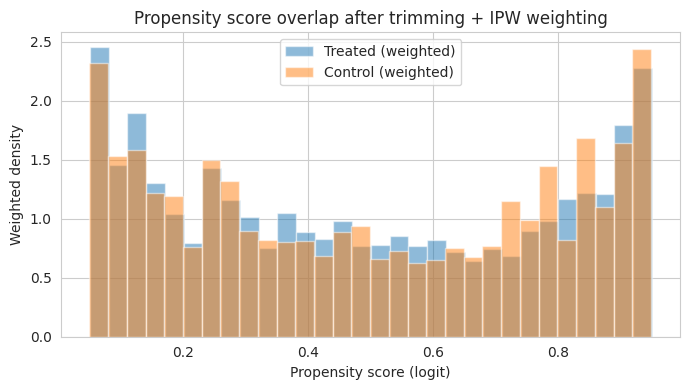

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

# Treated
mask_t = df_trim["D"] == 1
plt.hist(
    df_trim.loc[mask_t, "ps_lr"],
    bins=30,
    density=True,
    weights=df_trim.loc[mask_t, "w_ipw_lr"],
    alpha=0.5,                 # transparency
    color="tab:blue",
    label="Treated (weighted)"
)

# Control
mask_c = df_trim["D"] == 0
plt.hist(
    df_trim.loc[mask_c, "ps_lr"],
    bins=30,
    density=True,
    weights=df_trim.loc[mask_c, "w_ipw_lr"],
    alpha=0.5,
    color="tab:orange",
    label="Control (weighted)"
)

plt.xlabel("Propensity score (logit)")
plt.ylabel("Weighted density")
plt.title("Propensity score overlap after trimming + IPW weighting")
plt.legend()
plt.tight_layout()
plt.show()
